In [1]:
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc
from AhpAnpLib import ratings_AHPLib as rate 

In [2]:
#When structuring objects assign a "name" and number in the parens:("name",#)
#When adding objects to other objects use the Var in the ()
#Best to preface cluster variables with CL

#Create the model
Economy2008=str.Model("Economy2008") 

In [3]:
#Create nodes for the Primary Factors
nAggDemand=str.Node("Agg Demand",1)
nAggSupply=str.Node("Agg Supply",2)
nGlobalFinancial=str.Node("Global Financial",3)
#Create a cluster to contain the primary factor nodes
CLPrimaryFactors=str.Cluster("Primary Factors",1)
#Add nodes to Primary Factors cluster (when adding objects use Var, not "name")
CLPrimaryFactors.addMultipleNodes2Cluster(nAggDemand,nAggSupply,nGlobalFinancial)
#Add cluster to model (when adding objects to an object use Var, not "names")
Economy2008.addCluster2Model(CLPrimaryFactors)

#Create aggregate demand factors (nodes)- make up "name" and include a number
nConsumption=str.Node("Consumption",1)
nExports=str.Node("Exports",2)
nInvestment=str.Node("Investment",3)
nConfidence=str.Node("Confidence",4)
nFiscalPolicy=str.Node("Fiscal Policy",5)
nMonetaryPolicy=str.Node("Monetary Policy",6)
nExpectedInflation=str.Node("Expected Inflation",7)
#Create an aggregate demand cluster (when structuring use "name" in parens)
CLAggregateDemandFactors=str.Cluster("Aggregate Demand",2)
#Add nodes (factors) to the aggregate demand cluster (use  Var not "name")
CLAggregateDemandFactors.addMultipleNodes2Cluster(nConsumption,nExports,nInvestment,nConfidence,nFiscalPolicy,nMonetaryPolicy,nExpectedInflation)
#Add aggregate demand factors cluster to model
Economy2008.addCluster2Model(CLAggregateDemandFactors)

#Create nodes for Fiscal Policy subfactors
nTaxPolicy=str.Node("Tax Policy", 1)
nGovtExpenditure=str.Node("Govt Expenditure",2)
#Create a fiscal policy cluster to contain the nodes 
CLFiscalPolicyIssues=str.Cluster("Fiscal Policy Issues",3)
#Add fiscal policy factors (nodes), using Var
CLFiscalPolicyIssues.addMultipleNodes2Cluster(nTaxPolicy,nGovtExpenditure)
#Add cluster to model (using Var, not "name")
Economy2008.addCluster2Model(CLFiscalPolicyIssues)

#Create the nodes (factors) for Aggregate Supply
nLaborCost=str.Node("Labor Cost",1)
nNaturalResourceCost=str.Node("Resource Cost",2)
nExpectations=str.Node("Expectations",3)
#Create an aggregate supply cluster to contain the factors
CLAggregateSupplyFactors=str.Cluster("Aggregate Supply",4)
#Add nodes to Aggregate Supply cluster
CLAggregateSupplyFactors.addMultipleNodes2Cluster(nLaborCost,nNaturalResourceCost,nExpectations)
#Add Aggregate Supply Factor cluster to model (use Var)
Economy2008.addCluster2Model(CLAggregateSupplyFactors)

#Create Nodes for Global Financial Contexts cluster
nInternationalRelations=str.Node("International Relations",1)
nGlobalFinancialIntegration=str.Node("Financial Integration",2)
nMortgageCrisis=str.Node("Mortgage Crisis",3)
nExpectationsOilPrices=str.Node("Oil Prices",4)
nFutureDollarValue=str.Node("Future Dollar",5)
#Create Cluster for Global Financial Context nodes and name it
CLGlobalFinancialContexts=str.Cluster("Global Financial",5)
#Add nodes to Global Financial cluster using Var
CLGlobalFinancialContexts.addMultipleNodes2Cluster(nInternationalRelations,nGlobalFinancialIntegration,nMortgageCrisis,nExpectationsOilPrices,nFutureDollarValue)
#Add Global Financial cluster to model using var
Economy2008.addCluster2Model(CLGlobalFinancialContexts)

#Create Nodes for Mortgage Crisis cluster
nUncertaintyHousingPrices=str.Node("Housing Prices",1)
nUncertaintyMortgageBackedSecurities=str.Node("Mortgage-backed Securities",2)
nCreditDefaultSwaps=str.Node("Credit Default Swaps",3)
nGovtIntervention=str.Node("Govt Intervention",4)
nFinancialReporting=str.Node("Financial Reporting",5)
#Create cluster for Mortgage Crisis nodes
CLMortgageCrisisIssues=str.Cluster("Mortgage Crisis Issues",6)
CLMortgageCrisisIssues.addMultipleNodes2Cluster(nUncertaintyHousingPrices,nUncertaintyMortgageBackedSecurities,nCreditDefaultSwaps,nGovtIntervention,nFinancialReporting)
#Add cluster to model using Var
Economy2008.addCluster2Model(CLMortgageCrisisIssues)

#Create Alternative Nodes
nSixMonths=str.Node("Six Months",1)
nTwelveMonths=str.Node("Twelve Months",2)
nTwentyfourMonths=str.Node("Twentyfour Months",3)
nThirtysixMonths=str.Node("Thirtysix Months",4)
#Create Alternative cluster with "name" and number
CLAlternatives=str.Cluster("Alternatives",7)
#Add nodes to cluster using Var
CLAlternatives.addMultipleNodes2Cluster(nSixMonths,nTwelveMonths,nTwentyfourMonths,nThirtysixMonths)
#Add cluster to model using Var
Economy2008.addCluster2Model(CLAlternatives)


In [4]:
#Make connections for upper level nodes that connect to all nodes of another cluster
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Agg Demand",CLAggregateDemandFactors.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Agg Supply",CLAggregateSupplyFactors.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Global Financial",CLGlobalFinancialContexts.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Fiscal Policy",CLFiscalPolicyIssues.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Mortgage Crisis",CLMortgageCrisisIssues.name)


In [5]:
#Make connections from nodes in Aggregate Demand nodes that go to alternatives
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Consumption",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Exports",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Investment",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Confidence",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Monetary Policy",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Expected Inflation",CLAlternatives.name)


In [6]:
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Tax Policy",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Govt Expenditure",CLAlternatives.name)


In [7]:
#Make connections from Aggregate Supply nodes to alternatives
Economy2008.addNodeConnectionFromAllNodesToAllNodesOfCluster (CLAggregateSupplyFactors.name,CLAlternatives.name)
Economy2008.addNodeConnectionFromAllNodesToAllNodesOfCluster(CLMortgageCrisisIssues.name,CLAlternatives.name)


In [8]:
#Make connections from Global Financial Contexts nodes down to Alts
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("International Relations",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Financial Integration",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Oil Prices",CLAlternatives.name)
Economy2008.addNodeConnectionFromNodeToAllNodesOfCluster("Future Dollar",CLAlternatives.name)


In [9]:
#Make connections back from Alternatives to Primary Factors
Economy2008.addNodeConnectionFromAllNodesToAllNodesOfCluster(CLAlternatives.name,CLPrimaryFactors.name)


In [10]:
#Export Questionnaire for judgments
input.export4ExcelQuestFull(Economy2008,"Economy2008_empty.xlsx")

Cluster from Primary Factors connected to: [Aggregate Demand order: 2, Aggregate Supply order: 4, Global Financial order: 5]
Cluster from Aggregate Demand connected to: [Fiscal Policy Issues order: 3, Alternatives order: 7]
Cluster from Fiscal Policy Issues connected to: [Alternatives order: 7]
Cluster from Aggregate Supply connected to: [Alternatives order: 7]
Cluster from Global Financial connected to: [Mortgage Crisis Issues order: 6, Alternatives order: 7]
Cluster from Mortgage Crisis Issues connected to: [Alternatives order: 7]
Cluster from Alternatives connected to: [Primary Factors order: 1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


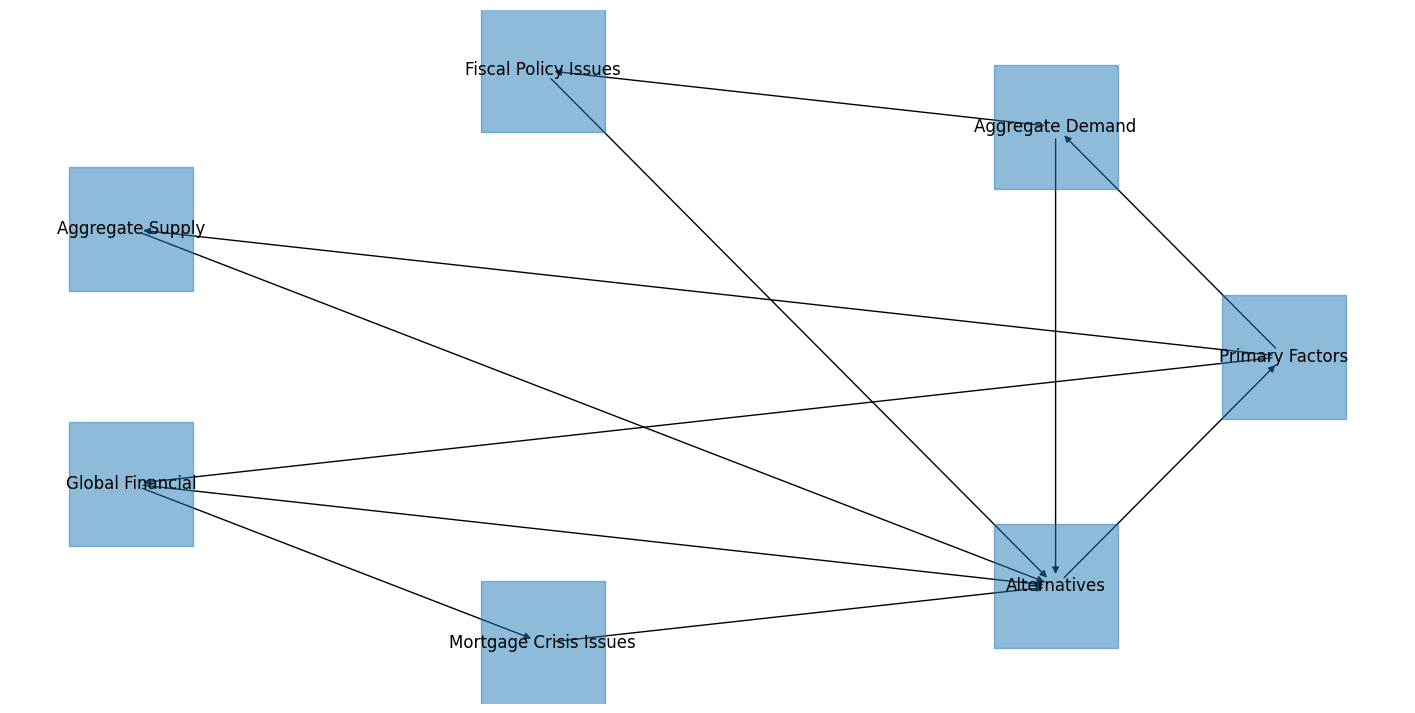

In [11]:
Economy2008.drawGraphClusters()

In [12]:
Economy2008.printStruct()

_________________________MODEL STRUCTURE_________________________
Name: Economy2008
Type: pairwise

____________________________NODES_______________________________
Agg Demand order: 1
Agg Supply order: 2
Global Financial order: 3
Consumption order: 1
Exports order: 2
Investment order: 3
Confidence order: 4
Fiscal Policy order: 5
Monetary Policy order: 6
Expected Inflation order: 7
Tax Policy order: 1
Govt Expenditure order: 2
Labor Cost order: 1
Resource Cost order: 2
Expectations order: 3
International Relations order: 1
Financial Integration order: 2
Mortgage Crisis order: 3
Oil Prices order: 4
Future Dollar order: 5
Housing Prices order: 1
Mortgage-backed Securities order: 2
Credit Default Swaps order: 3
Govt Intervention order: 4
Financial Reporting order: 5
Six Months order: 1
Twelve Months order: 2
Twentyfour Months order: 3
Thirtysix Months order: 4
____________________________CLUSTERS____________________________
Primary Factors order: 1
Aggregate Demand order: 2
Fiscal Policy 

In [13]:

calc.calcAHPMatricesSave2File(Economy2008,"2008Economy_filled.xlsx","Economy2008_results.xlsx")


Matrix not a  Hierarchy 
Anp result [0.175 0.116 0.026 0.062 0.004 0.009 0.018 0.036 0.040 0.005 0.006 0.030
 0.018 0.069 0.029 0.001 0.007 0.011 0.004 0.003 0.004 0.003 0.003 0.000
 0.001 0.031 0.063 0.095 0.128]
Limit matrix [[0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
  0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175 0.175
  0.175 0.175 0.175 0.175 0.175]
 [0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116
  0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116 0.116
  0.116 0.116 0.116 0.116 0.116]
 [0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026
  0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026
  0.026 0.026 0.026 0.026 0.026]
 [0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062
  0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062
  0.062 0.062 0.062 0.062 0.062]
 [0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004